# Neural networks

In [1]:
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## The house prices dataset

Based on [this](https://medium.com/intuitive-deep-learning/intuitive-deep-learning-part-1a-introduction-to-neural-networks-d7b16ebf6b99) and [this](https://medium.com/intuitive-deep-learning/intuitive-deep-learning-part-1b-introduction-to-neural-networks-8565d97ddd2d). 

Let us build a neural network that predicts whether the house price is below or above the median value. 
Dataset:https://github.com/markitosanches/machine/blob/master/housepricedata.csv

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [5]:
AMP=df['AboveMedianPrice'].value_counts()
print(AMP)

0    732
1    728
Name: AboveMedianPrice, dtype: int64


Now, we split the dataset into our input features and the label we wish to predict.

In [6]:
X = df.iloc[:,0:10] #take all rows and all columns from 0 up to and not including 10
Y = df.iloc[:,10] #take all rows and column number 10

## Preparing the data

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)

## Configuring the network architecture 

We will be using the Sequential model, which means that we merely need to describe our layers in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [10]:
model = Sequential([
    Dense(30, activation='relu', input_shape=(10,)),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid'),
])

## Configuring the training process

Before we start our training, we have to configure the model by
- Telling it what algorithm we want to use for the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics we want to track apart from the loss function (we want to track accuracy as well):

In [11]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the model

We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which wenables us to observe the progress of the learning process.

In [12]:
history = model.fit(X_train, Y_train, 
          batch_size=32, epochs=100, verbose=0,
          validation_data=(X_test, Y_test))

# Testing the model

In [13]:
print("Accuracy on house prices:",model.evaluate(X_test, Y_test)[1])

14/14 [==============================] - 0s 461us/step - loss: 0.3049 - accuracy: 0.8699
Accuracy on house prices: 0.8698630332946777


We can visualize the learning process like this:

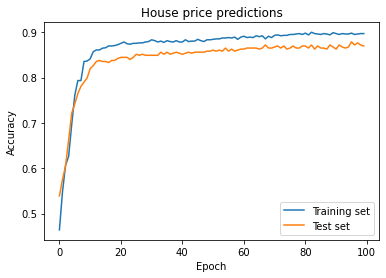

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('House price predictions')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='lower right')
plt.show()